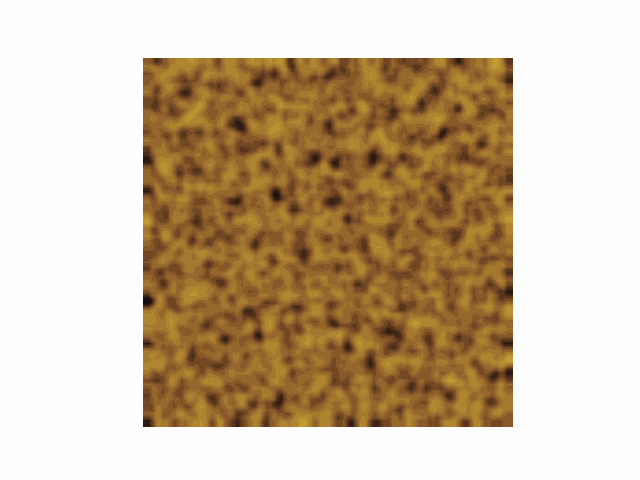

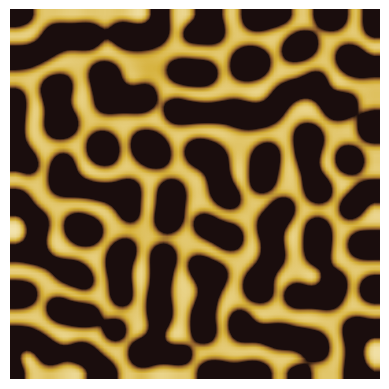

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from matplotlib.colors import LinearSegmentedColormap
from IPython.display import Image

# Parametry
a = 2.8e-4
b = 5e-3
tau = 0.1
k = -0.005
size = 100
dx = 2.0 / size
dt = 0.001

# Inicjalizacja
U = np.random.rand(size, size)
V = np.random.rand(size, size)

# Definicja gepardziej palety
cheetah_colors = ["#1a0d0d", "#8b5a2b", "#d4af37", "#fff8dc"]  
cheetah_cmap = LinearSegmentedColormap.from_list("cheetah", cheetah_colors)

# Przygotowanie figury
fig, ax = plt.subplots()
im = ax.imshow(U, cmap=cheetah_cmap, interpolation='bilinear', animated=True)
ax.axis('off')

def laplacian(Z):
    return (
        Z[:-2, 1:-1] + Z[2:, 1:-1] +
        Z[1:-1, :-2] + Z[1:-1, 2:] -
        4 * Z[1:-1, 1:-1]
    ) / dx**2

# def update(frame, U, V):
#     for _ in range(250):
#         deltaU = laplacian(U)
#         deltaV = laplacian(V)
#         Uc, Vc = U[1:-1, 1:-1], V[1:-1, 1:-1]
#         U[1:-1, 1:-1] = Uc + dt * (a * deltaU + Uc - Uc**3 - Vc + k)
#         V[1:-1, 1:-1] = Vc + dt * (b * deltaV + Uc - Vc) / tau
#         for Z in (U, V):
#             Z[0, :] = Z[1, :]
#             Z[-1, :] = Z[-2, :]
#             Z[:, 0] = Z[:, 1]
#             Z[:, -1] = Z[:, -2]
#     im.set_array(U)
#     return [im]

color_counts_over_time = []

def indexed_colormap(U_frame, cmap, bins=4):

    normed_U = (U_frame - U_frame.min())/(U_frame.max() - U_frame.min())
    indices = np.floor(normed_U*bins).astype(int)
    indices[indices == bins] = bins - 1 
    return indices

def update(frame, U, V):
    for _ in range(250):
        deltaU = laplacian(U)
        deltaV = laplacian(V)
        Uc, Vc = U[1:-1, 1:-1], V[1:-1, 1:-1]
        U[1:-1, 1:-1] = Uc + dt * (a * deltaU + Uc - Uc**3 - Vc + k)
        V[1:-1, 1:-1] = Vc + dt * (b * deltaV + Uc - Vc) / tau
        for Z in (U, V):
            Z[0, :] = Z[1, :]
            Z[-1, :] = Z[-2, :]
            Z[:, 0] = Z[:, 1]
            Z[:, -1] = Z[:, -2]

    im.set_array(U)
    
    color_indices = indexed_colormap(U, cheetah_cmap)
    counts = np.bincount(color_indices.ravel(), minlength=4)
    color_counts_over_time.append(counts)
    
    # Zapisz obraz po ostatniej klatce
    if frame == 99:  # Ostatnia klatka (100 klatek, indeksowanie od 0)
        plt.savefig("final_cheetah_fur.png", dpi=300, bbox_inches='tight')

    return [im]

ani = FuncAnimation(fig, update, frames=100, blit=True, fargs=(U, V))
ani.save("turing_animation.gif", writer=PillowWriter(fps=7))
Image(filename='turing_animation.gif')

In [17]:
from PIL import Image as PILImage
import numpy as np

cheetah_colors_hex = ["#1a0d0d", "#8b5a2b", "#d4af37", "#fff8dc"]
cheetah_colors_rgb = np.array([tuple(int(h[i:i+2], 16) for i in (1, 3, 5)) for h in cheetah_colors_hex])

def map_image_to_cheetah_palette(image_path, size=(100, 100)):
    img = PILImage.open(image_path).convert("RGB").resize(size, PILImage.LANCZOS)
    img_array = np.array(img)

    pixels = img_array.reshape(-1, 3)

    dists = np.linalg.norm(pixels[:, None] - cheetah_colors_rgb[None, :], axis=2)
    
    indices = np.argmin(dists, axis=1)
    
    counts = np.bincount(indices, minlength=4)

    result = {f"Kolor {i+1}": int(counts[i]) for i in range(4)}

    return result

pixels_color_cheetach = [map_image_to_cheetah_palette(f'cheetah_images/cheetah_image_{i}.jpg') for i in range(1,11)]

[[ 14.31782106 126.25767303 236.70445708 376.75721625]
 [  8.77496439 132.38202295 242.6952822  382.55195726]
 [  1.73205081 140.47419692 250.4775439  388.48423391]
 ...
 [182.22513548  49.49747468  80.51086883 214.68348795]
 [181.38357147  52.74466798  86.02325267 212.57234063]
 [249.81593224 118.14397996  65.1459899  146.81621164]]
[0 0 0 ... 1 1 2]
[[ 15.         151.8255578  261.         401.01620915]
 [ 27.91057147 167.04789732 276.58452596 415.21560664]
 [ 27.91057147 167.04789732 276.58452596 415.21560664]
 ...
 [ 19.10497317 122.29881439 232.59621665 368.88209498]
 [ 13.92838828 126.90941651 237.21298447 374.0708489 ]
 [ 11.         129.81910491 240.15203518 376.9960212 ]]
[0 0 0 ... 0 0 0]
[[222.20261025  98.80283397  83.24662155 167.57386431]
 [212.93426216  88.37986196  81.41867108 177.63445612]
 [148.68086629  33.7934905  112.73863579 242.57988375]
 ...
 [232.45644753 101.36074191  62.16108107 162.95704956]
 [188.14887722  57.14892825  77.38216849 207.17866686]
 [179.189843

In [60]:
print(pixels_color_cheetach)

[{'Kolor 1': 3822, 'Kolor 2': 3939, 'Kolor 3': 2222, 'Kolor 4': 17}, {'Kolor 1': 4012, 'Kolor 2': 2057, 'Kolor 3': 910, 'Kolor 4': 3021}, {'Kolor 1': 3304, 'Kolor 2': 3198, 'Kolor 3': 2887, 'Kolor 4': 611}, {'Kolor 1': 5713, 'Kolor 2': 3902, 'Kolor 3': 383, 'Kolor 4': 2}, {'Kolor 1': 5559, 'Kolor 2': 3006, 'Kolor 3': 1222, 'Kolor 4': 213}, {'Kolor 1': 1861, 'Kolor 2': 2523, 'Kolor 3': 2203, 'Kolor 4': 3413}, {'Kolor 1': 3850, 'Kolor 2': 4986, 'Kolor 3': 1163, 'Kolor 4': 1}, {'Kolor 1': 3554, 'Kolor 2': 3250, 'Kolor 3': 2818, 'Kolor 4': 378}, {'Kolor 1': 2199, 'Kolor 2': 2040, 'Kolor 3': 3832, 'Kolor 4': 1929}, {'Kolor 1': 4269, 'Kolor 2': 4310, 'Kolor 3': 1420, 'Kolor 4': 1}]


In [63]:
values_array = np.array([[d[f'Kolor {i+1}'] for i in range(4)] for d in pixels_color_cheetach])
mean_pixels = np.mean(values_array, axis=0)
mean_result = {f"Kolor {i+1}": round(mean_pixels[i], 2) for i in range(4)}

print(mean_result)

{'Kolor 1': 3814.3, 'Kolor 2': 3321.1, 'Kolor 3': 1906.0, 'Kolor 4': 958.6}


[3814.3 3321.1 1906.   958.6]


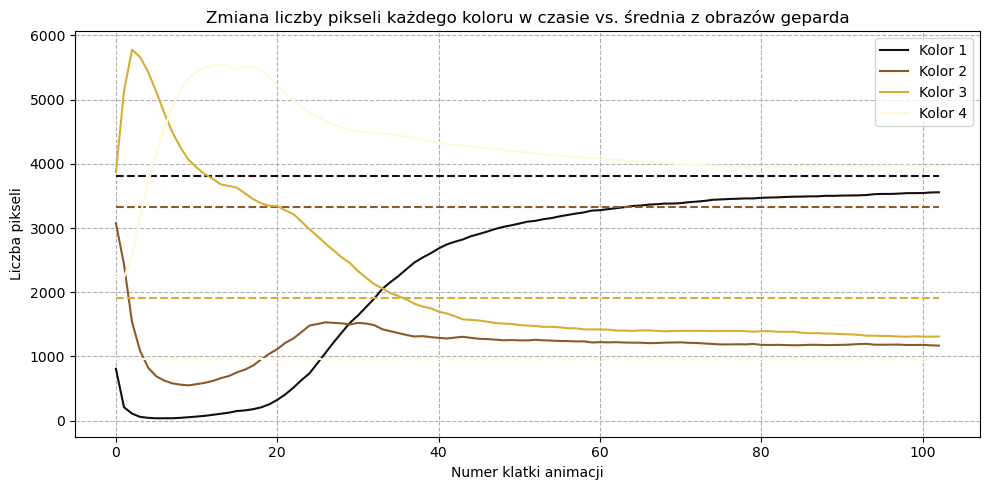

In [64]:
import numpy as np
import matplotlib.pyplot as plt

cheetah_colors = ["#1a0d0d", "#8b5a2b", "#d4af37", "#fff8dc"]


values_array = np.array([[d[f'Kolor {i+1}'] for i in range(4)] for d in pixels_color_cheetach])
mean_pixels = np.mean(values_array, axis=0)
print(mean_pixels)
color_counts_over_time = np.array(color_counts_over_time)

plt.figure(figsize=(10, 5))
for i, color in enumerate(cheetah_colors):
    plt.plot(color_counts_over_time[:, i], label=f'Kolor {i+1}', color=color)
    plt.hlines(mean_pixels[i], 0, len(color_counts_over_time)-1,
               linestyles='dashed', colors=color, alpha=1)

plt.title("Zmiana liczby pikseli każdego koloru w czasie vs. średnia z obrazów geparda")
plt.xlabel("Numer klatki animacji")
plt.ylabel("Liczba pikseli")
plt.legend()
plt.grid(linestyle="--")
plt.tight_layout()
plt.savefig("porownanie_kolorow_w_czasie.png")
plt.show()


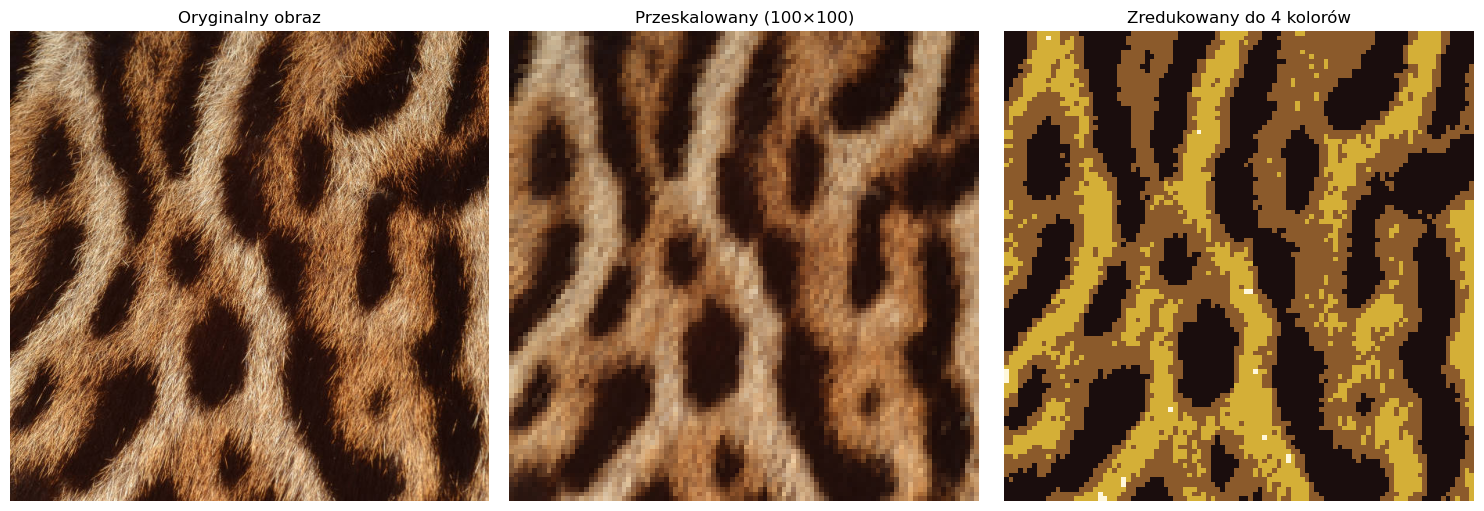

In [58]:
from PIL import Image as PILImage
import numpy as np
import matplotlib.pyplot as plt

# Paleta gepardzia – HEX i RGB
cheetah_colors_hex = ["#1a0d0d", "#8b5a2b", "#d4af37", "#fff8dc"]
cheetah_colors_rgb = np.array([tuple(int(h[i:i+2], 16) for i in (1, 3, 5)) for h in cheetah_colors_hex])

def process_cheetah_image(image_path, size=(100, 100)):
    # Oryginalny obraz
    original_img = PILImage.open(image_path).convert("RGB")
    
    # Przeskalowany obraz
    resized_img = original_img.resize(size, PILImage.LANCZOS)
    img_array = np.array(resized_img)
    
    # Przekształcanie kolorów
    pixels = img_array.reshape(-1, 3)
    dists = np.linalg.norm(pixels[:, None] - cheetah_colors_rgb[None, :], axis=2)
    indices = np.argmin(dists, axis=1)
    recolored_pixels = cheetah_colors_rgb[indices].reshape(img_array.shape).astype(np.uint8)
    recolored_img = PILImage.fromarray(recolored_pixels)

    return original_img, resized_img, recolored_img

# Przykład: ścieżka do obrazu geparda
image_path = "cheetah_images/cheetah_image_1.jpg"

# Przetwarzanie
original_img, resized_img, recolored_img = process_cheetah_image(image_path)

# Wyświetlanie
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
titles = ["Oryginalny obraz", "Przeskalowany (100×100)", "Zredukowany do 4 kolorów"]

for ax, img, title in zip(axes, [original_img, resized_img, recolored_img], titles):
    ax.imshow(img)
    ax.set_title(title)
    ax.axis('off')

plt.tight_layout()
plt.show()



In [12]:
from PIL import Image as PILImage
import numpy as np

cheetah_colors_hex = ["#1a0d0d", "#8b5a2b", "#d4af37", "#fff8dc"]
cheetah_colors_rgb = np.array([tuple(int(h[i:i+2], 16) for i in (1, 3, 5)) for h in cheetah_colors_hex])

def get_color_indices(image_path, size=(100, 100)):
    img = PILImage.open(image_path).convert("RGB").resize(size, PILImage.LANCZOS)
    img_array = np.array(img)
    pixels = img_array.reshape(-1, 3)
    dists = np.linalg.norm(pixels[:, None] - cheetah_colors_rgb[None, :], axis=2)
    indices = np.argmin(dists, axis=1)
    return indices.reshape(size)

def color_adjacency_map(color_indices):
    H, W = color_indices.shape
    co_occurrence = np.zeros((4, 4), dtype=int)
    for i in range(H):
        for j in range(W):
            c = color_indices[i, j]
            for di, dj in [(-1,0), (1,0), (0,-1), (0,1)]:
                ni, nj = i + di, j + dj
                if 0 <= ni < H and 0 <= nj < W:
                    n_c = color_indices[ni, nj]
                    co_occurrence[c, n_c] += 1
    return co_occurrence


matrix = [color_adjacency_map(get_color_indices(f"cheetah_images/cheetah_image_{i}.jpg")) for i in range(1,11)]
matrix_mean = np.mean(matrix,axis=0)
matrix_final = color_adjacency_map(get_color_indices("final_cheetah_fur.png"))
print(matrix_mean)
print(matrix_final)
print(abs(matrix_mean-matrix_final))

[[12062.2  2801.8   221.9    19.8]
 [ 2801.8  8014.8  1992.    334.6]
 [  221.9  1992.   4512.8   822.4]
 [   19.8   334.6   822.4  2625.2]]
[[15946  1722   540     0]
 [ 1722  1412  1813   101]
 [  540  1813 10216   355]
 [    0   101   355  2964]]
[[3883.8 1079.8  318.1   19.8]
 [1079.8 6602.8  179.   233.6]
 [ 318.1  179.  5703.2  467.4]
 [  19.8  233.6  467.4  338.8]]


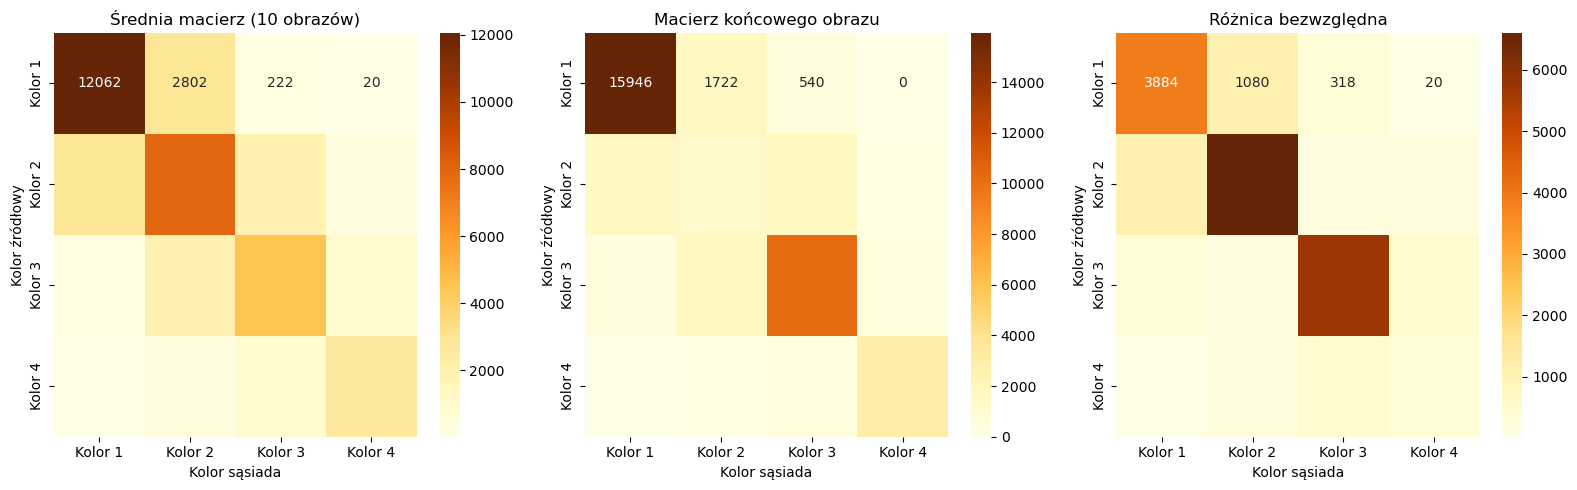

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

labels = ["Kolor 1", "Kolor 2", "Kolor 3", "Kolor 4"]

def plot_heatmaps(mean_matrix, final_matrix):
    diff_matrix = np.abs(mean_matrix - final_matrix)

    fig, axes = plt.subplots(1, 3, figsize=(16, 5))

    for ax, matrix, title in zip(
        axes,
        [mean_matrix, final_matrix, diff_matrix],
        ["Średnia macierz (10 obrazów)", "Macierz końcowego obrazu", "Różnica bezwzględna"]
    ):
        sns.heatmap(matrix, annot=True, fmt=".0f", cmap="YlOrBr", xticklabels=labels, yticklabels=labels, ax=ax)
        ax.set_xlabel("Kolor sąsiada")
        ax.set_ylabel("Kolor źródłowy")
        ax.set_title(title)

    plt.tight_layout()
    plt.show()

plot_heatmaps(matrix_mean, matrix_final)
